# importing thee libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,20)
import warnings
warnings.filterwarnings('ignore')

C:\Users\KSK\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## loading the dataset

In [2]:
df=pd.read_csv('C:/Users/KSK/Downloads/code basics house price prediction project/Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## dropping unwanted columns

In [6]:
df2=df.drop(['availability','society','area_type','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## checking for the null values

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
 df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### observed error values in bhk feature

In [14]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


## exploring the total_sft value because for 2400 sft 43 bhk is impossible 

In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## some of the values in the total_sft feature are range of the numbers

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


## defining the function to convert the range value in feature into the average value

In [18]:
def range_into_avg(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(range_into_avg)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## feature engineering and dimensionality reduction

In [20]:
df5=df4.copy()
df5['price/sqft']=(df5['price']*100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### checking for the location feature

In [21]:
len(df5['location'].unique())

1304

In [22]:
df5['location'].value_counts()

Whitefield              534
Sarjapur  Road          392
Electronic City         302
Kanakpura Road          266
Thanisandra             233
                       ... 
Somanna Garden            1
Sadahalli                 1
Off Bannergatta Road      1
Tharabanahalli            1
basaveshwarnagar          1
Name: location, Length: 1304, dtype: int64

In [23]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [24]:
location_stats[location_stats<=10]

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [25]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [26]:
len(df5.location.unique())

1293

In [27]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [28]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### outlier removal and detection

In [29]:
df5[(df5.total_sqft/df5.bhk)<300]

,location,size,total_sqft,bath,price,bhk,price/sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [30]:
df5.shape,len(df5[(df5.total_sqft/df5.bhk)<300])

((13246, 7), 744)

In [31]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

### lets look at the outliers in the price/sqft feature

In [32]:
df6['price/sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price/sqft, dtype: float64

## i will consider the data points only with in (mean+1 std dev) and (mean-1 std dev) in price/sft feature

In [36]:
def remove_price_sqft(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean1=np.mean(subdf['price/sqft'])
        stdv=np.std(subdf['price/sqft'])
        df_reduced=subdf[(subdf['price/sqft']>(mean1-stdv)) & (subdf['price/sqft']<(mean1+stdv))]
        df_out=pd.concat([df_out,df_reduced],ignore_index=True)
    return df_out
df7=remove_price_sqft(df6)
df7.shape
    

(10241, 7)

### defining the function for scatter plot for checking outliers in bhk and price

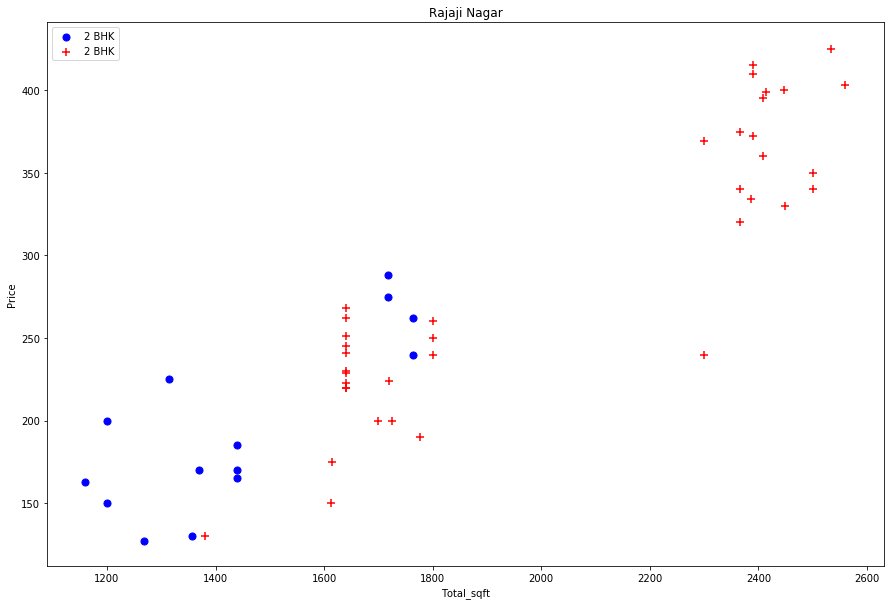

In [44]:
def scatter_plot(df,location):
    bhk2=df[(df.bhk==2) & (df.location==location)]
    bhk3=df[(df.bhk==3) & (df.location==location)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='2 BHK',s=50,marker='+')
    plt.xlabel('Total_sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
scatter_plot(df7,'Rajaji Nagar')
    

### from the above scatter plot it is observed that some outlier points are present at (1800,250) cdoordinates

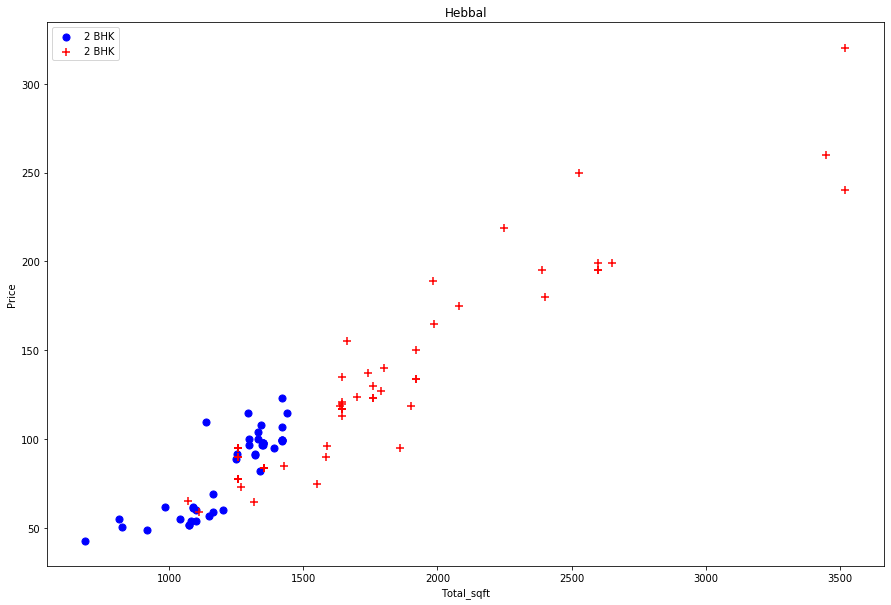

In [45]:
scatter_plot(df7,'Hebbal')

### lets remove the data points of the same location where the price of 3 bed room is less than the price of 2 bed room 

In [61]:
def rem_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in df.groupby('bhk'):
            bhk_stats[bhk]={'mean':np.mean(bhk_df['price/sqft']),'stdv':np.std(bhk_df['price/sqft']),'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index') 

df8=rem_bhk_outliers(df7)
df8.shape

(5350, 7)

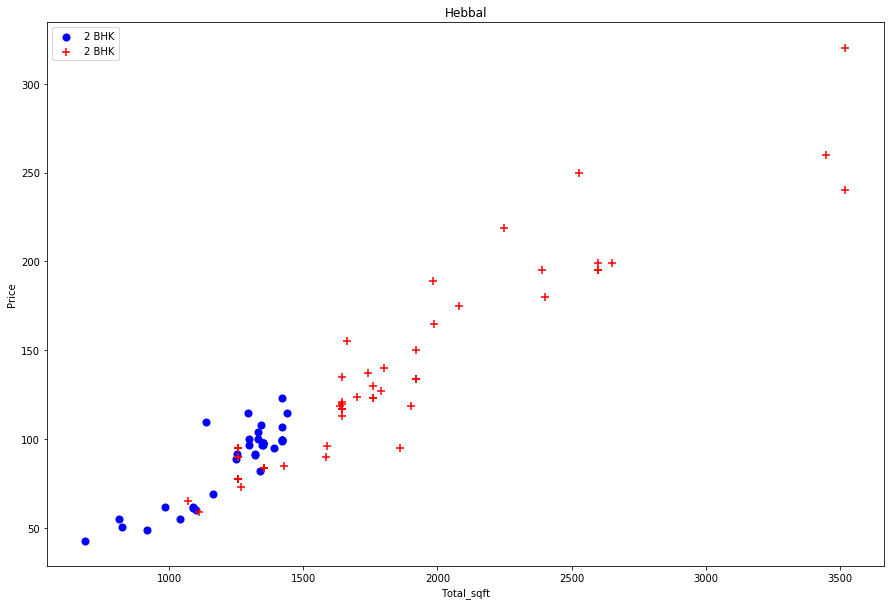

In [62]:
scatter_plot(df8,'Hebbal')

### hsitogram for price/sqft

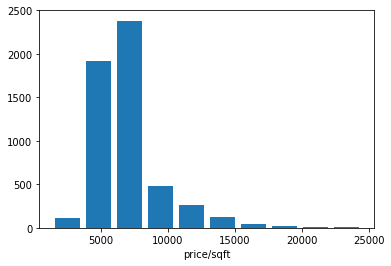

In [68]:
plt.figure(figsize=(6,4))
plt.hist(df8['price/sqft'],rwidth=0.8)
plt.xlabel('price/sqft')
plt.show()

### from the above histogram it is observed that majority of the data points are spread across 0 to 10000

### let us explore the bathroom feature

In [69]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 16., 12., 13.])

### from the above data points some of the apartments are having 13 bathrooms practically which is not possible

In [70]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price/sqft
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


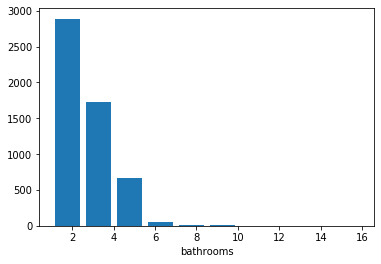

In [71]:
plt.figure(figsize=(6,4))
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('bathrooms')
plt.show()

### from the above histogram most of the bathrooms are less than 5

### removing the data points if bathroom>bedroom+2 condition satisfied

In [72]:
df8[df8.bath>(df8.bhk)+2]

,location,size,total_sqft,bath,price,bhk,price/sqft
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [73]:
df9=df8[df8.bath<(df8.bhk)+2]
df9.shape

(5282, 7)

## drop the price/sft and size features

In [74]:
df10=df9.drop(['size','price/sqft'],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### one hot encoding

In [76]:
dummies_df=pd.get_dummies(df10['location'])
dummies_df.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df11=pd.concat([df10,dummies_df.drop(['other'],axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df12=df11.drop(['location'],axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### seperating the target column

In [79]:
X=df12.drop(['price'],axis='columns')
y=df12['price']

### train test split

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

### base model building

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
#y_pred=lt.predict(X_test)
lr.score(X_test,y_test)

0.8587266401297653

### cross validation

In [83]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([ 8.16684136e-01, -3.32974372e+14, -1.23877614e+13,  8.46447691e-01,
        8.51547439e-01])

### grid search cv

In [86]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
def find_bestmodel_gridcv(X,y):
    #defining the dictionary
    algos={'linear_regression':{'model':LinearRegression(),'params':{'normalize':[True,False]}},'lasso':{'model':Lasso(),'params':{'alpha':[1,2],'selection':['random','cyclic']}},'decision_tree':{'model':DecisionTreeRegressor(),'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}}}

    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    scores=[]
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({'model':algo_name,'best_score':gs.best_score_,'params':gs.best_params_})
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_bestmodel_gridcv(X,y)

,model,best_score,best_params
0,linear_regression,-2.237387e+14,NaN
1,lasso,7.419595e-01,NaN
2,decision_tree,8.123767e-01,NaN


### defining function for price prediction

In [99]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>0:
        x[loc_index]=1
    return lr.predict([x])[0]
    

In [100]:
predict_price('1st Phase JP Nagar',1000,2,2)

84.42530710111822

In [101]:
predict_price('1st Phase JP Nagar',1000,3,3)

90.02959975193266

In [102]:
predict_price('Indira Nagar',1000,2,2)

154.41026732738823

In [103]:
predict_price('Indira Nagar',1000,3,3)

160.0145599782026

### dumping the model into pickle file

In [104]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [105]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))